<a href="https://colab.research.google.com/github/rdbrow10/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Covid-19 Prediction Trials

**By: Ryan Brown**

***Warning! The values calculated are the total recorded cases and covid-related fatalities. It was my intention to do it by day but I used a data set that tracks the total recorded in the US.***

## Introduction

### My Project

I will be taking a look at the number of covid cases and fatalities in the US at the start of the covid pandemic. Reviewing the amount of cases on and after January 21, 2020. I am doing this because covid entered the US around January 21, 2020 and began to spread. Also, reviewing the number of fatalities on and after March 2, 2020. Since, fatalitlies can occur weeks and months after the first day of infection. I wanted a larger pool of data. I will then predict the number of cases and fatalities 10 days after the last day I am reviewing for each category. Initially, I was going to take a look at predicting the number of cases and fatalities in the upcoming days, but I wanted to do a trial where I can compare the predictions made to the reported number of cases and fatalities on those specific days. 

### My Prediction

When trying to predict the number of covid cases and covid-related deaths, it can be difficult to predict these numbers soley due to external factors that cannot be precisely valued. Thus, I believe that these predictions will be undervalued as many people during the first few months of covid didn't think they would get it and/or didn't think it was that bad. 

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

## Covid Cases in the US

In [4]:
path='https://raw.githubusercontent.com/rdbrow10/Final-Project/main/Cases.csv'
ds = pd.read_csv(path, index_col=0)
ds.head(95)

,Day_Number,Cases,Day_Trial,Day_Number_Trial,Number_of_Patients_Trial
Date,,,,,
2020-01-21,1,1,2020-02-05,16.0,11.0
2020-01-22,2,1,2020-02-16,27.0,13.0
2020-01-23,3,1,2020-02-22,33.0,15.0
2020-01-24,4,2,2020-02-27,38.0,58.0
2020-01-25,5,2,2020-03-03,43.0,118.0
...,...,...,...,...,...
2020-04-21,91,695873,NaN,NaN,NaN
2020-04-22,92,722598,NaN,NaN,NaN
2020-04-23,93,750284,NaN,NaN,NaN


In [25]:
x = ds['Day_Number']
y = ds['Cases']
x_test_patient = ds['Day_Number_Trial'][:12]
y_test_patient = ds['Number_of_Patients_Trial'][:12]
x_prediction =[[96],[97],[98],[99],[100],[101],[102],[103],[104],[105],[106]]

### Using a Linear Regression Model: Covid Cases

We can use a linear regression model to see the total recorded cases as they increase along a straight line if there are no external factors (traveling, safety, temperatures, or etc.) This will be represented as a straight line to see the average infection increase per day. 

In [26]:
linear_regression=LinearRegression()

yy=np.log10(y)

scores = []

Linear_Regression = LinearRegression()

cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test , yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    Linear_Regression.fit(X_train.values.reshape(-1,1), yy_train)
    scores.append(Linear_Regression.score(X_test.values.reshape(-1,1), yy_test))
    
print("Average Linear Regression:",sum(scores)/len(scores))  

Average Linear Regression: 0.947731350509466


Above we get the average linear regression value. 

In [27]:
Linear_Regression.fit(x.values.reshape(-1,1), yy)
y_test_patient_log=np.log10(y_test_patient)
evaluation_1 =Linear_Regression.predict(x_test_patient.values.reshape(-1,1))
score=Linear_Regression.score(x_test_patient.values.reshape(-1,1), y_test_patient_log)   
print("Final Linear Regression:",score)

Final Linear Regression: 0.9303292029481323


Above we find that the final linear regression value is 0.9344

### 11 Day Prediction: Covid Cases

In [45]:
print('Predictions for the Next 11 Days:')
for predict in x_prediction:
  print('day',predict,'=',int(5.3**Linear_Regression.predict([predict])))

Predictions for the Next 11 Days:
day [96] = 781141
day [97] = 883783
day [98] = 999912
day [99] = 1131300
day [100] = 1279953
day [101] = 1448140
day [102] = 1638425
day [103] = 1853715
day [104] = 2097293
day [105] = 2372878
day [106] = 2684674


Here we have predicted the total recorded cases in the next 11 days after April 25, 2020. We used the linear regression model to predict these values as it tells us the constant increase in covid cases over the ~3 month data set.

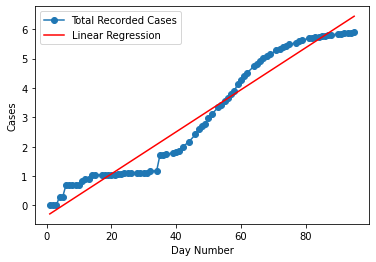

In [29]:
predicted1 = Linear_Regression.predict(x.values.reshape(-1,1))
predicted11 = 10**Linear_Regression.predict(x.values.reshape(-1,1))
plt.plot(x, yy, 'o-',label='Total Recorded Cases')
plt.plot(x, predicted1,c='#ff0000',label='Linear Regression')
plt.legend()
plt.xlabel('Day Number')
plt.ylabel('Cases')
plt.show()

Here we have a graph displaying the total recorded cases (blue dotted line) and the linear regression (red dotted line). Again the linear regression line represensts the total recorded cases during a given set of days. I converted this to a logarithmic graph to avoid having high number values, so it is easier to follow. 

## Covid-Related Fatalities in the US

In [30]:
path2='https://raw.githubusercontent.com/rdbrow10/Final-Project/main/Fatalities.csv'
ds_fatalities = pd.read_csv(path2, index_col=0)
ds_fatalities.head(60)

,Day_Number,Fatalities,Day_Trial,Day_Number_Trial,Fatalities_Trial
Date,,,,,
2020-03-02,1,6,2020-03-18,17.0,171.0
2020-03-03,2,9,2020-03-24,23.0,957.0
2020-03-04,3,11,2020-03-28,27.0,2754.0
2020-03-05,4,12,2020-04-01,31.0,6394.0
2020-03-06,5,14,2020-04-05,35.0,11793.0
2020-03-07,6,17,2020-04-11,41.0,23843.0
2020-03-08,7,21,2020-04-16,46.0,34619.0
2020-03-09,8,22,2020-04-22,52.0,47894.0
2020-03-10,9,30,2020-04-28,58.0,59266.0


In [31]:
x_fatalities = ds_fatalities['Day_Number']
y_death = ds_fatalities['Fatalities']
x_test_deaths = ds_fatalities['Day_Number_Trial'][:9]
y_test_deaths = ds_fatalities['Fatalities_Trial'][:9]
x_prediction2 =[[61],[62],[63],[64],[65],[66],[67],[68],[69],[70]]

### Using a Linear Regression Model: Covid-Related Fatalities

In [32]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

y_log_D = np.log10(y_death)

scores = []

Linear_Regression = LinearRegression()

cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x_fatalities):
    X_train_D, X_test_D, y_log_train_D, y_log_test_D= x_fatalities[train_index], x_fatalities[test_index], y_log_D[train_index], y_log_D[test_index]
    
    Linear_Regression.fit(X_train_D.values.reshape(-1,1), y_log_train_D)
    scores.append(Linear_Regression.score(X_test_D.values.reshape(-1,1), y_log_test_D))
    
print("Average Linear Regression:",sum(scores)/10)

Average Linear Regression: 0.7764526194667118


Above is the average linear regression value.

In [33]:
Linear_Regression.fit(x_fatalities.values.reshape(-1,1), y_log_D)
y_test_deaths_log=np.log10(y_test_deaths)
evaluation_4 =Linear_Regression.predict(x_test_deaths.values.reshape(-1,1))
score=Linear_Regression.score(x_test_deaths.values.reshape(-1,1), y_test_deaths_log)   
print("Final Linear Regression:",score)

Final Linear Regression: 0.8092388877578485


Here we have the final linear regression value. 

### 10 Day Prediction: Covid-Related Fatalities

In [52]:
print('Preddictions for the Next 10 Days:')
for predict in x_prediction2:
  print('day',predict,'=',int(6.8**Linear_Regression.predict([predict])))

Preddictions for the Next 10 Days:
day [61] = 41335
day [62] = 47637
day [63] = 54900
day [64] = 63271
day [65] = 72918
day [66] = 84035
day [67] = 96848
day [68] = 111614
day [69] = 128632
day [70] = 148244


Here we have predicted the total number of recorded covid-related fatalities over the next 10 days after April 30, 2020. Same as in predicting the covid cases, we use the linear regression model to predict these values. 

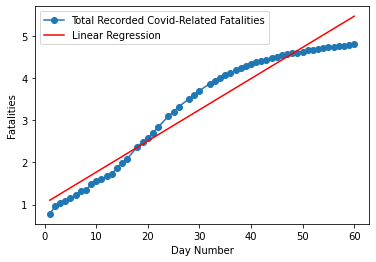

In [35]:
predicted4 =(Linear_Regression.predict(x_fatalities.values.reshape(-1,1)))
plt.plot(x_fatalities, y_log_D, 'o-',label='Total Recorded Covid-Related Fatalities')
plt.plot(x_fatalities, predicted4,c='#ff0000',label='Linear Regression')
plt.legend()
plt.xlabel('Day Number')
plt.ylabel('Fatalities')
plt.show()

Here we have a graph displaying the total recorded covid-related fatalities (blue dotted line) and the linear regression (red dotted line). Again, I converted this to a logarithmic graph to avoid having high number values, so it is easier to follow.

## Explanation

### Linear Regression

Linear regression is used here because it is the easiest way of finding an estimate over a period of time in these variables above. The equation for linear regression in our situation is y = bx + a. In this equation 'b' represents the slope of the line, computed by find the (sum of all y-coordinates)/(the sum of all the x-coordinates). As most people know, the a represents the y-intercept. This equation can be used in many different areas, but depending on what you are predicting can chnage this equation in different ways. For example, if we were to consider also taking another variable into account, lets say population, we would have a limit on the amount of cases posssible each day. Thus, the equation will be different.  

## CDC Reported Covid Cases and Covid-Related Fatalities

Here I will be reviewing the CDC Covid-19 records, looking at the total number of recorded cases and fatalities reported by date once a week. By comparing the total predicted covid cases to the total reported covid cases, we will be able to see the accuracy of pridecting the total covid cases using the linear regression model. By, also comparing the total predicted covid-related fatalities to the total reported covid-related fatalities, we will also be able to see the accuracy in terms of predicting the total covid-related fatalities. I would have liked to get the total recorded cases by day to be able to really compare, but I could not find data on that except for certain websites that may not be credible. So I will just use the information provided by the CDC.

### Covid Cases:

In [24]:
path3='https://raw.githubusercontent.com/rdbrow10/Final-Project/main/CDCReportedCovidCases'
ds_CDCCovidCases = pd.read_csv(path3, index_col=0)
ds_CDCCovidCases.head(4)

,Total_Cases
Date,
Apr-22-2020,854344
Apr-29-2020,1051270
May-6-2020,1239636


The above is a table of the total recorded cases in the US reported by the CDC. We can now compare the predicted total recorded cases to the reported total cases. So, by looking at the total predicted cases on May 6, 2020 or day 106 we get a total of 2,684,674 cases ever recorded. Although the CDC reported that on May 6, 2020 there had only been 1,239,636. This is quite suprising how high this value is. I originally thought a linear regression line would undervalue this due to behaviors, but I forgot to consider there is a limit to population size so there could only be a certain amount of cases occurring each day. Here we can see how linear regression can work well in some aspects but not so well in others. By looking closer, I can see that due to the increase in the trend I can see that the total recorded cases were increasing at a higher amount each week, which would explain why the linear regression model predicted such a high number. 

### Covid-Related Fatalities:

In [36]:
path4='https://raw.githubusercontent.com/rdbrow10/Final-Project/main/CDCReportedCovidFatalities'
ds_CDCCovidFatalities = pd.read_csv(path4, index_col=0)
ds_CDCCovidFatalities.head(10)

,Total_Fatalities
Date,
Apr-29-2020,64204
May-6-2020,76939
May-13-2020,87305


The above is a table of total recorded covid-related fatalities in the US by each week. As before we can use the same method of determining the accuracy of linear regression now in terms of total recorded covid-related fatalities. On May 6, 2020 it was predicted that the total recorded covid-related fatalitlies would hit 84,035. But, the CDC reported that on May 6, 2022 the total recorded covid-related fatalities hit 76,939. This is also a bit high which I believe is due to the linear regression curve not being completey accurate. But we can still see that the value is close enough to make the connection. 

## My Hope for Future Machine Learning Applications

I reallly enjoyed doing this project, even though I have never been good with coding. I would like to try to attempt more applications with machine learning and apply it to my future career and passions. One way I would like to use machine learning and more specifically linear regression is predicting the amount of homes purchasing solar panels in the next decade. I am very passionate about renewable energy, so it would be nice to peak into the future and hopefully put my mind at ease! I think I might try to do this over winter break or sometime when I have a lot of free time. I think there are so many ways we can apply machine learning into programs, to make it easy for poeple to see future predictions in many different areas. 

## Conclusion/Discussion

I started off thinking that the predictions would undervalue the amount of cases and fatalities. After reviewing my predictions and the CDC reported cases and fatalities, I have realized that it overvalues the case and fatlities. I believe this is due to the dates I was looking at. During the time interval I chose, covid was very new and was spreading a lot quicker and there were less people that got covid, thus there were more people availble to be infected. The infection rate seemed to slow down as there is a limit to population which the linear regression model does not take into account. Although a linear regression model has some constraints it is a great way to predict certain outcomes. Linear regression models can also be applied in many different forms. We can use it to find, lets say, the future total number of cheese burgers eaten in the US. By going through the same process with the same available information we can determine how much the total number of cheeseburger eaten will increase in just a month, or a year, it really doesn't matter how far in the future we want to predict. But, do this with caution as predicting futher and futher in the future can make your results less and less accurate. In the end, a linear regression model uses the values provided to graph a line that represents a constant increase in covid cases without the consideration of external factors that cannot be easily computed (i.e. behaviors, safety, and etc.).

## References:

1. https://covid.cdc.gov/covid-data-tracker/#datatracker-home
2. https://www.mayoclinic.org/coronavirus-covid-19/map
3. MAT 494 - Chapter 1 Lecture Notes: Linear Algebra
4. https://github.com/AlessandroMinervini/COVID-19-forecasting/blob/4bfa143d21ba2ceac16b5080ac642d7049498b61/linear_regression.py
5. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8871757/#:~:text=The%20COVID%2D19%20cases%20as,of%20support%20vector%20regression%20model.
